<a href="https://colab.research.google.com/github/RamiroCabri1/Laboratorio-d/blob/main/Untitled22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratorio
Análisis de Datos de Ventas Mensuales 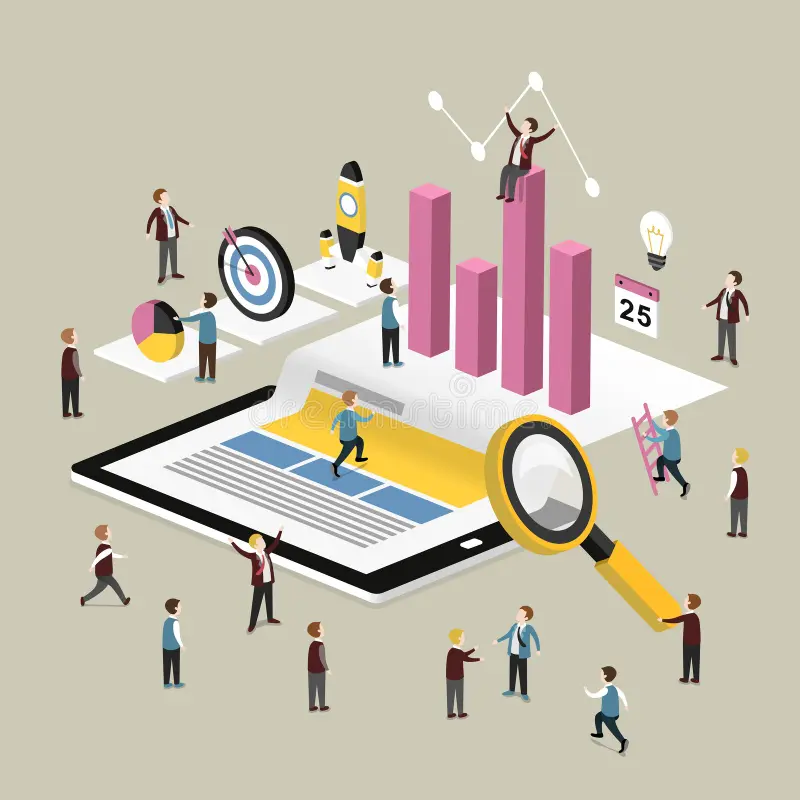

Questions to answer in the analysis —————————————————————————————————————————

1. Sales behavior in different months:
● How did sales vary across different months?
● Were there any months that stood out in terms of sales?
● What is the total income generated per month?

2. Advertising optimization and hourly sales pattern:
● What is the ideal time of day to present the advertising and increase the
purchase probability?
● How do hourly sales patterns change throughout the year?
● Are there changes in sales patterns during peak hours?
in the different months?

3. Distribution of sales by location:
● In which cities have the highest sales been recorded?
● How do sales compare in different states or regions?
● Is there variation in sales by state over the months?

4. Analysis of the best-selling product:
● What is the best-selling product overall and in each month?
● What factors do you think have contributed to the success of that particular product?

5. Sales trend:
● Is there any trend or pattern in sales that repeats itself over the days
in different months?
● How do sales vary across different days of the week?
● Are there any significant differences in sales between business days and
weekends?

6. Impact of special events on sales:
● Has there been any significant increase or decrease in sales in days
close to special events, such as holidays?
● What specific events have had a notable impact on the behavior of
sales and how was that impact manifested?



##Libraries and drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import glob
import plotly.graph_objects as go
import os
import plotly.express as px
import matplotlib.pyplot as plt

Mounted at /content/drive



● How did sales vary throughout the different months?

● Were there any months that stood out in terms of sales?

● What is the total income generated per month?

####What do we have here?

In [3]:
# A first look. What we are going to do is use the sales dataset 2, which is included in my Drive.
# There are 12 csv files that we are going to concatenate to be able to work easier, then we will remove some nans to make a couple of previews of some data we have.
# Finally, the global sales per month will be shown.

# This way I can concatenate the csv files to have them in a single variable.
# I use the glob library, then I create a list and with a for loop I add the cvs, and then with pd.concat I group them.

path = r'/content/drive/MyDrive/DataAnalisis'
all_files = glob.glob(path+"/*.csv")


li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

# Let's see how it turns out
print(frame)

       ID de Pedido                    Producto Cantidad Pedida  \
0            176558        USB-C Charging Cable               2   
1               NaN                         NaN             NaN   
2            176559  Bose SoundSport Headphones               1   
3            176560                Google Phone               1   
4            176560            Wired Headphones               1   
...             ...                         ...             ...   
186845       295660      AAA Batteries (4-pack)               2   
186846       295661        USB-C Charging Cable               1   
186847       295662    Lightning Charging Cable               1   
186848       295663      AAA Batteries (4-pack)               1   
186849       295664                Google Phone               1   

       Precio Unitario Fecha de Pedido                    Dirección de Envio  
0                11.95  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1                  NaN             Na

####A little cleaning

In [4]:
# I remove the rows that contain NaN.
df_sales = frame.dropna()

## This eliminates some rows that had irrelevant data.

df_sales = df_sales.drop(df_sales[df_sales['Producto'].apply(lambda x: isinstance(x, str) and x == 'Product')].index)
df_sales['Cantidad Pedida'] = pd.to_numeric(df_sales['Cantidad Pedida'], errors='coerce')
df_sales['Precio Unitario'] = pd.to_numeric(df_sales['Precio Unitario'], errors='coerce')

# Looking at the difference it is observed that 890 rows were eliminated.

df_sales

ID de Pedido                    Producto  Cantidad Pedida  \
0            176558        USB-C Charging Cable                2   
2            176559  Bose SoundSport Headphones                1   
3            176560                Google Phone                1   
4            176560            Wired Headphones                1   
5            176561            Wired Headphones                1   
...             ...                         ...              ...   
186845       295660      AAA Batteries (4-pack)                2   
186846       295661        USB-C Charging Cable                1   
186847       295662    Lightning Charging Cable                1   
186848       295663      AAA Batteries (4-pack)                1   
186849       295664                Google Phone                1   

        Precio Unitario Fecha de Pedido                    Dirección de Envio  
0                 11.95  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2                 99.99  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3                600.00  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4                 11.99  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5                 11.99  04/30/19 09:27     333 8th St, Los Angeles, CA 90001  
...                 ...             ...                                   ...  
186845             2.99  11/04/19 14:17     574 4th St, Los Angeles, CA 90001  
186846            11.95  11/23/19 07:22          359 1st St, Austin, TX 73301  
186847            14.95  11/13/19 16:12         900 10th St, Boston, MA 02215  
186848             2.99  11/17/19 17:08       592 Sunset St, Boston, MA 02215  
186849           600.00  11/17/19 16:13      428 Jackson St, Boston, MA 02215  

[185950 rows x 6 columns]

#1. How did sales vary throughout the different months?:

● How did sales vary throughout the different months?

● Were there any months that stood out in terms of sales?

● What is the total income generated per month?

In [63]:
ruta_de_archivos = '/content/drive/MyDrive/DataAnalisis'

# Function that returns a list of the names of the files and subdirectories in a given directory,
# in this case the DataAnalisis directory of my Drive.

archivos = os.listdir(ruta_de_archivos)

dataframes= {}

# The for and if clicks basically create an object (df-sales) by looping through the files within the already created "files" object.
# While traversing this object it separates month by month, cleans data,
#  transforms values to integers and adds each particular data with its corresponding monthly name to the already created dictionary dataframe.

for archivo in archivos:
    if archivo.endswith('.csv'):
        mes = archivo.split('_')[3].split('.')[0]
        ruta_completa = os.path.join(ruta_de_archivos, archivo)
        df = pd.read_csv(ruta_completa)
        df_ventas = df.copy()

        df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors='coerce')
        df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors='coerce')


        df_ventas = df_ventas.loc[~df_ventas['Cantidad Pedida'].isna()]
        df_ventas = df_ventas.loc[~df_ventas['Precio Unitario'].isna()]


        df_ventas = df_ventas.dropna()


        df_ventas['Cantidad Pedida'] = df_ventas['Cantidad Pedida'].astype(int)
        df_ventas['Precio Unitario'] = df_ventas['Precio Unitario'].astype(int)

        dataframes[mes] = df_ventas
# List with months, to later use.

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# A function is created that uses datetime to be able to work with dates and times.

def extraer_datos(datos):
  datos['Fecha de Pedido'] = pd.to_datetime(datos['Fecha de Pedido'])
  datos['Hora'] = datos['Fecha de Pedido'].dt.hour
  datos['Dia'] = datos['Fecha de Pedido'].dt.day
  return datos

# Lists with the data to be used in the graph to be created. Using the function already created, the for loop seen below will add the necessary and added data to the lists.

totales_ventas = []
nombres_meses = []

for mes in meses:
    dataframe_mes = dataframes[mes]
    dataframe_mes = extraer_datos(dataframe_mes)

    total_ventas_mes = dataframe_mes['Cantidad Pedida'].sum()
    totales_ventas.append(total_ventas_mes)
    nombres_meses.append(mes)


fig = go.Figure()

fig.add_trace(go.Bar(
    x=nombres_meses,
    y=totales_ventas,
    marker=dict(color=totales_ventas, colorscale = 'RdYlGn', colorbar=dict(title="Total sales", x=1.0, thickness=15)),
    text=totales_ventas,
    textposition='auto',

))


fig.update_layout(
    title="Total sales per month",


)

fig.show()


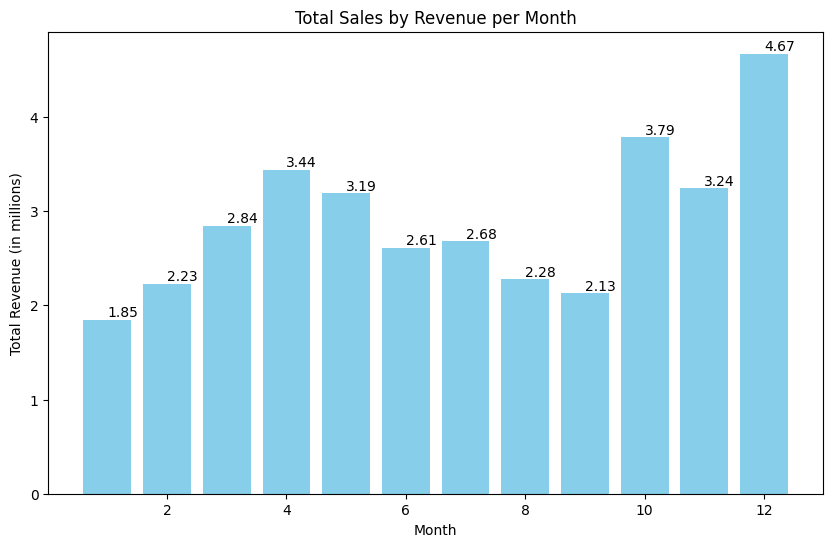

In [47]:
# I create a new column to then group
df_sales['Ingresos'] = df_sales['Cantidad Pedida'] * df_sales['Precio']



# I group and add.
df_grouped1 = df_sales.groupby(df_sales['Fecha de Pedido'].dt.month)['Ingresos'].sum()


df_grouped1 = df_grouped1 / 1e6


plt.figure(figsize=(10, 6))
bars = plt.bar(df_grouped1.index, df_grouped1.values, color='skyblue')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xlabel('Month')
plt.ylabel('Total Revenue (in millions)')
plt.title('Total Sales by Revenue per Month')
plt.show()

###Results :

####● How did sales vary throughout the different months?

####As a summary you can see that the graph shows high numbers of sales in what could be defined as two groups of months. The first composed of the months of March, April and May, and the second contains the last 3 months of the year, which would be October, November and December.

####Regarding the group of months made up of November, October and December, there is no doubt that the dates closest to the end of the year concentrate the greatest amount of sales. We can name certain dates in the US holiday calendar that would drive the level of sales, these could be: November 25: Black Fridey; October 28: Cyber Monday; the last day of November: Thanksgiving Day and of course the entire month of December, dedicated to the end of the year festivities.
####On the other hand, although not with the same level of sales, the first group of months finds the month of April and festivities such as Easter as the moment where sales take off.

####● Were there any months that stood out in terms of sales?

####Yes, december whit a total of 28121

####● What is the total income generated per month?



####As we can see in graph 1.1, sales by income coincide with graph 1.0 of sales by total units, two groups of months are observed and these lead the sale.

#2. Advertising optimization and hourly sales pattern:

● What is the ideal time of day to present the advertising and increase the purchase probability?

● How do hourly sales patterns change throughout the year?

● Are there changes in sales patterns during peak hours? in the different months?

In [49]:
Horas = list(range(24))
# I use the same for cycle as in point 1, as well as the extract_data function to be able to obtain the data on sales quantities per hour for the entire year.
# Then with the object, already created, we graph.

fig = go.Figure()

for mes in meses:
    dataframe_mes = dataframes[mes]
    dataframe_mes = extraer_datos(dataframe_mes)
    Ventas_por_hora = dataframe_mes.groupby('Hora')['Cantidad Pedida'].sum()




    fig.add_trace(go.Scatter(
        x=Horas,
        y=Ventas_por_hora,
        mode='lines',
        name=mes,
        line=dict(width=2,shape='spline'),
    ))

fig.update_layout(
    title="Units sold per hour in different months",
    xaxis=dict(title="Hour", tickvals=Horas),
    yaxis=dict(title="Sold units", side="left"),
    legend=dict(y=0.3, yanchor='bottom'),
)

fig.show()

### Results:

#####●  What is the ideal time of day to present the advertising and increase the purchase probability?


#####As you can see in the graph there are two sales peaks. A peak at 12 noon and another at 7 p.m.
#####Hours surrounding these, for obvious reasons, also concentrate many sales.
#####This is a parameter that is repeated throughout the year.
#####Therefore, the best hours to insert advertising would be these two: 12 noon and 7 p.m.

#####● How do hourly sales patterns change throughout the year?


#####Purchase patterns remain convergent in terms of maximum and minimum quantities (throughout the year) between 2 am and 5 pm. In any case, starting at 3am you begin to see growth in sales, managing to take off in quantity after 6am, this for all months of the year.
#####It can be seen that December is in all cases the month that concentrates the greatest amount of sales at different times of the day.
#####As the day progresses (and always taking off at 3am) sales begin with a rebound in units placed on the market, reaching the peaks of units (as highlighted in the previous point) between 10 a.m. to 2 p.m. and 5 p.m. to 7 p.m.
#####After 8 p.m. their decline begins, always remembering that the behavior is similar throughout the year.

#####● Are there changes in sales patterns during peak hours? in the different months?

#####We could say that the months of October, December, June and May are those with a more pronounced curve at peak sales. This means that in those months the variation of the peak with respect to the average is wider. This is due to the different special dates (holidays or discounts) that the US calendar has.



#3. Sales distribution by location:

● In which cities have the highest sales been recorded?

● How do sales compare in different states or regions?

● Is there variation in sales by state over the months?

In [8]:

# In this case I took the data set without nans, then I created a new dataset (called citys_sales) in which I go
# to take only the cities, leaving aside the post code and address number,
# this with the loc and str split functions to separate.


citys_sales=df_sales.loc[:,["Cantidad Pedida","Dirección de Envio"]]

citys_sales["ciudad"] = citys_sales["Dirección de Envio"].str.split(',', expand=True)[1]

citys_sales=citys_sales.loc[:,["Cantidad Pedida","ciudad"]]




In [58]:


# City with the highest percentage of sales

fig = px.pie(citys_sales, values='Cantidad Pedida', names='ciudad',
             title='City with the highest percentage of sales')
fig.update_traces(textposition='inside', textinfo='percent+label',hole=.3)
fig.update_layout(title_x=0.5)
fig.show()

In [59]:
# In a similar way to the one used above, I was able to filter the dataset so that I could only keep the quantities ordered by state.

ventas_por_estado = df_sales.loc[:,["Cantidad Pedida","Dirección de Envio"]]

ventas_por_estado["estado"] = ventas_por_estado["Dirección de Envio"].str.split(',', expand=True)[2]

ventas_por_estado = ventas_por_estado.loc[:,["Cantidad Pedida","estado"]]

ventas_por_estado["estado"] = ventas_por_estado["estado"].str.split(' ', expand=True)[1]

ventas_por_estado

Cantidad Pedida estado
0                     2     TX
2                     1     MA
3                     1     CA
4                     1     CA
5                     1     CA
...                 ...    ...
186845                2     CA
186846                1     TX
186847                1     MA
186848                1     MA
186849                1     MA

[185950 rows x 2 columns]

In [60]:
fig = px.pie(ventas_por_estado, values='Cantidad Pedida', names='estado',
             title='Estate with the highest percentage of sales')
fig.update_traces(textposition='inside', textinfo='percent+label', hole=.3)
fig.update_layout(title_x=0.5)
fig.show()

In [12]:
grand_sales=df_sales.loc[:,["Cantidad Pedida","Dirección de Envio","Fecha de Pedido"]] # Groups.
grand_sales["month"] = grand_sales["Fecha de Pedido"].str.split('/', expand=True)[0] # Comienzo a separar mes de dia.
grand_sales=grand_sales.loc[:,["Cantidad Pedida","Dirección de Envio","month"]]
grand_sales["estado"] = grand_sales["Dirección de Envio"].str.split(',', expand=True)[2] # The idea is to generate a new column with only state abbreviations. I use split again.


grand_sales["estado"] = grand_sales["estado"].str.split(' ', expand=True)[1]
grand_sales=grand_sales.loc[:,["Cantidad Pedida","estado","month"]]
grand_sales # The idea is to generate a new column with only state abbreviations. I use split again.
print(grand_sales)




        Cantidad Pedida estado month
0                     2     TX    04
2                     1     MA    04
3                     1     CA    04
4                     1     CA    04
5                     1     CA    04
...                 ...    ...   ...
186845                2     CA    11
186846                1     TX    11
186847                1     MA    11
186848                1     MA    11
186849                1     MA    11

[185950 rows x 3 columns]


In [13]:


grouped = grand_sales.groupby(['month', 'estado'])['Cantidad Pedida'].count() # I group pandas into a series.
dataframe3 = grouped.to_frame() # I convert that pandas series into a new dataset.
print(dataframe3)

              Cantidad Pedida
month estado                 
01    CA                 3895
      GA                  785
      MA                 1051
      ME                  123
      NY                 1313
...                       ...
12    ME                  315
      NY                 3402
      OR                 1332
      TX                 3355
      WA                 1978

[96 rows x 1 columns]


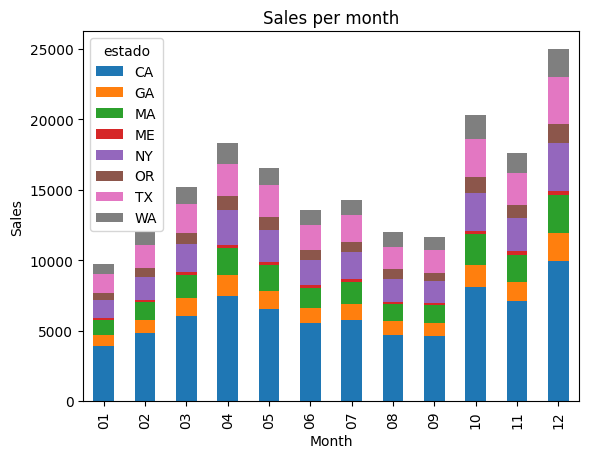

In [61]:


# I group the data again by month and state and calculate the sum of sales.
grouped = dataframe3.groupby(['month', 'estado'])['Cantidad Pedida'].sum()

# grouped.unstack() It is very important because it unpacks the data and creates new columns with months as columns and the states as rows.
# Each cell in the new DataFrame will contain the sum of sales for that month and state combination.

# I use matplotlib to create another plot with the plot function.

grouped.unstack().plot(kind='bar', stacked=True)




plt.title('Sales per month')
plt.xlabel('Month')
plt.ylabel('Sales')


plt.show()

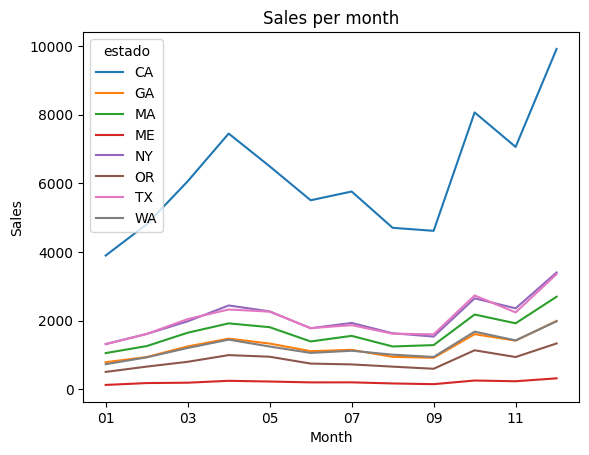

In [15]:
# Both graphs use the same plot but only the "line" variables are modified by the "bar" and without the "stack" and we can achieve a better visual representation.

grouped.unstack().plot(kind='line')


plt.title('Sales per month')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.show()

###Results:
#####● In which cities have the highest sales been recorded?
#####As can be seen in the graph, the city that concentrated the greatest number of sales throughout the year was San Francisco in the state of CA (California). With 24% percent of annual sales, closely followed by Los Angeles (also in the same state)

#####● How do sales compare in different states or regions?

#####The graph shows us that the state of California (with San Francisco and Los Angeles) is in the leadership of the company's annual sales with 40% of total sales. Below you can see that TX (Texas) and NY (New York) both have a very similar percentage of 13.4% for NY and 13.3 for TX.


#####● Is there variation in sales by state over the months?


#####The most significant case is the state of California where we find pronounced peaks and valleys in its graph. Starting in January with around 4,000 monthly sales, gradually rising to a peak in April with approximately 7,000 units, then gradually decreasing until June and then remaining stable with a slight increase until July. Sales begin to drop to almost the minimum during the month of August, then suddenly they begin to climb during the month of September and October with an approximate peak of 8,000 placements, and then sales decline until November and finally reach to the maximums in December. It is noteworthy that for all months they follow this pattern that is observed in the state of California, but without such abrupt peaks and valleys. The only state that maintains a similar average sale throughout the year is ME (Maine). This is one of the 10 least populated states in the American Union; therefore, it is understandable that the level of sales is low in terms of quantities.


#4. Analysis of the best-selling product:

● What is the best-selling product overall and in each month?

● What factors do you think have contributed to the success of that particular product?

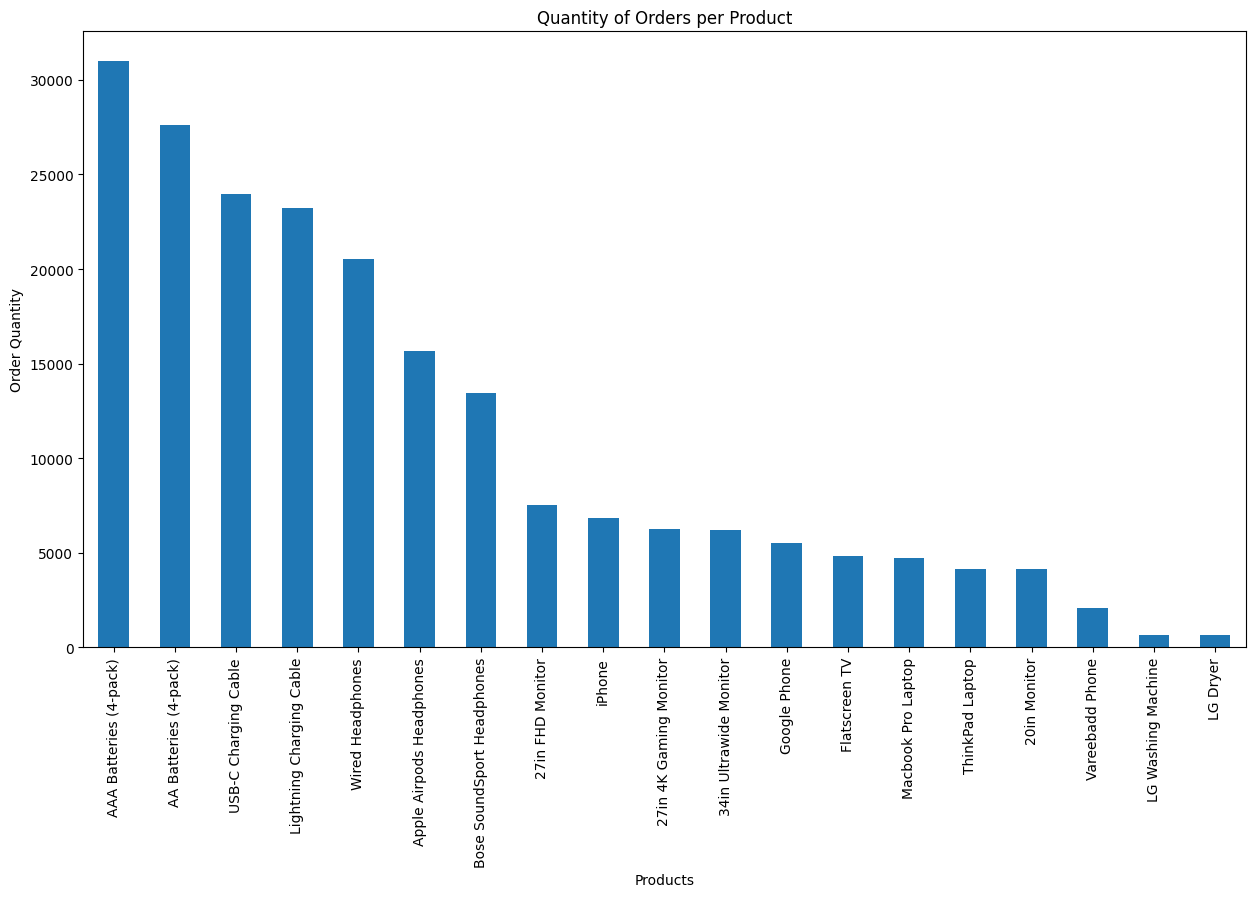

In [71]:




df_grouped = df_sales.groupby('Producto')['Cantidad Pedida'].sum() # I group product and quantity, as it is annual, the month does not matter.
df_grouped = df_grouped.sort_values(ascending=False )

# Create the Graph

plt.figure(figsize=(15, 8))
df_grouped.plot.bar(rot=0)
x = df_grouped.plot.bar(rot=90)
plt.xlabel('Products')
plt.ylabel('Order Quantity')
plt.title('Quantity of Orders per Product')

plt.show()

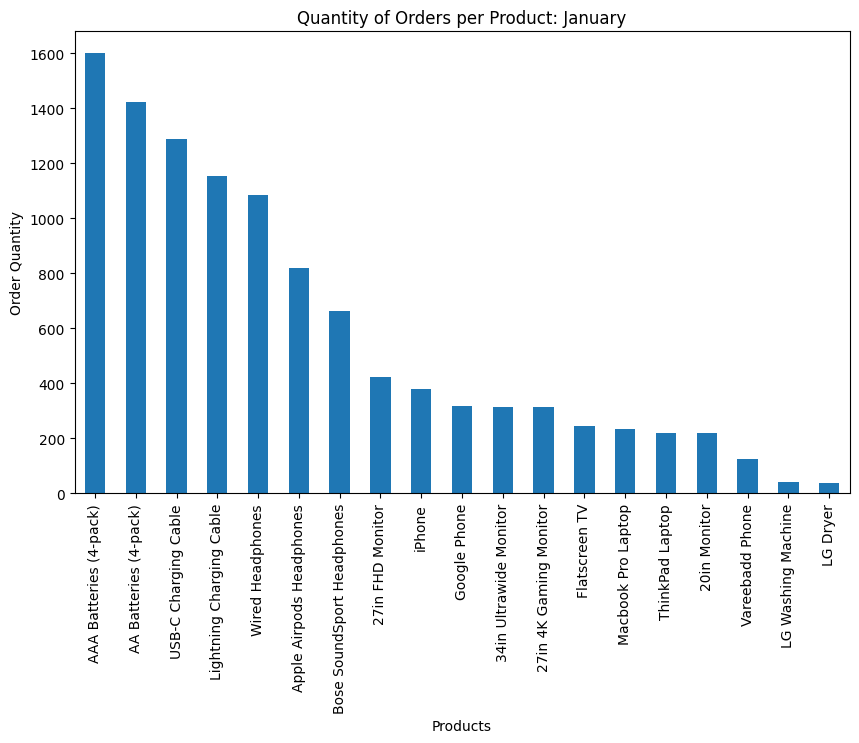

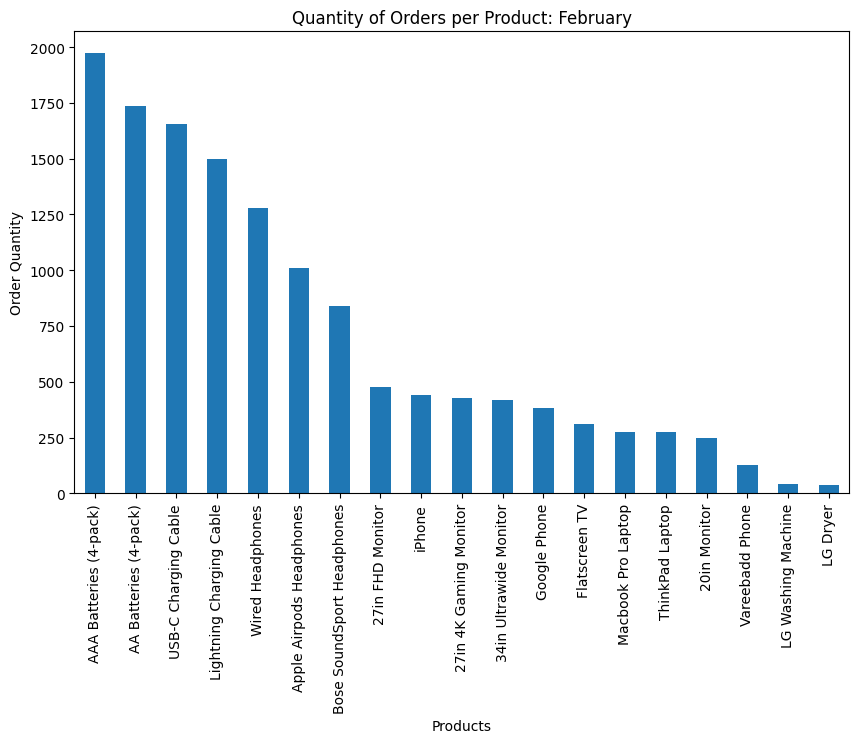

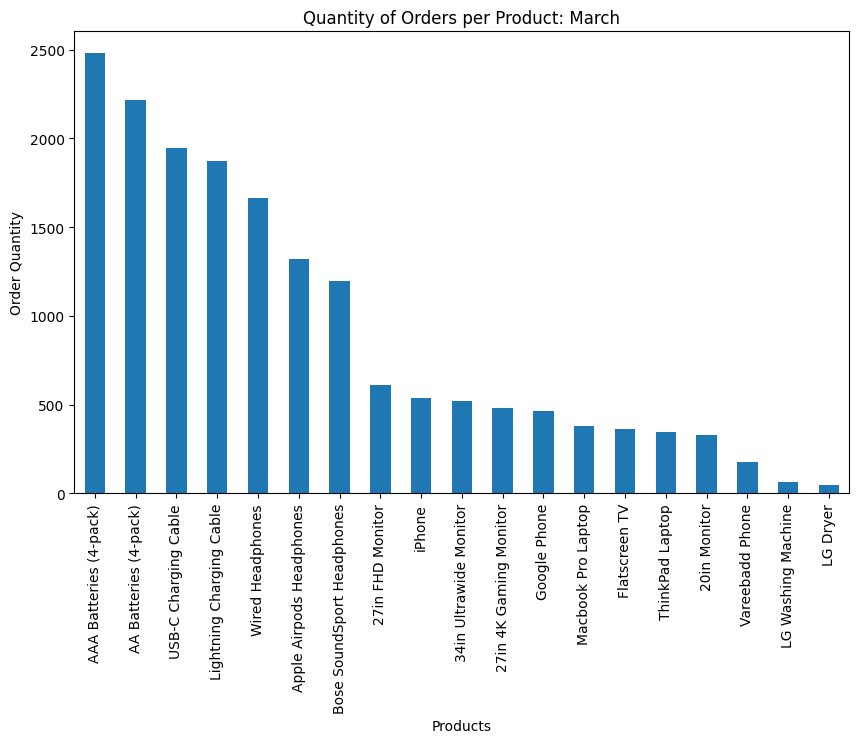

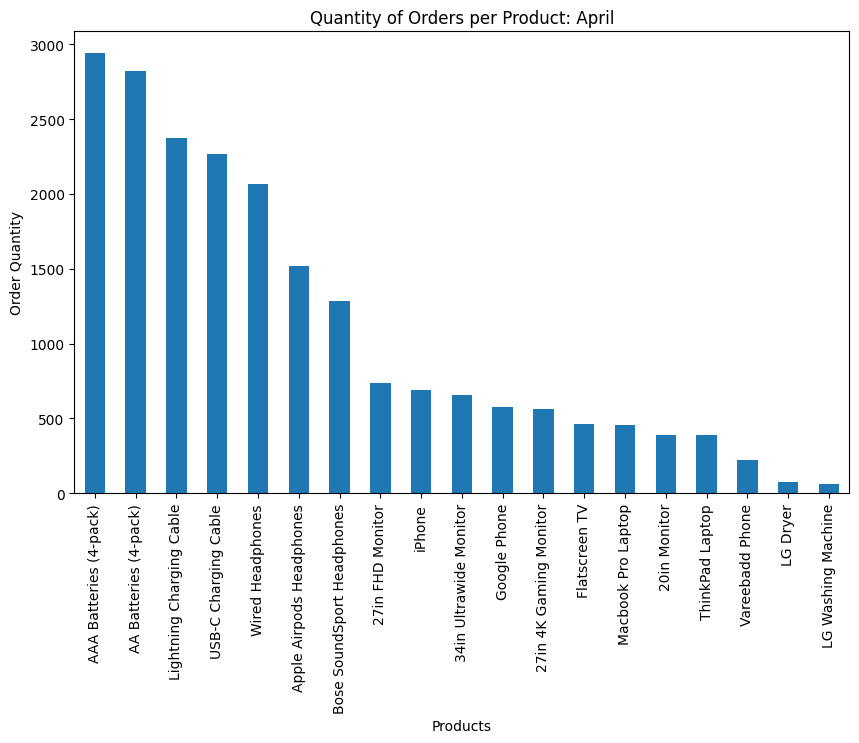

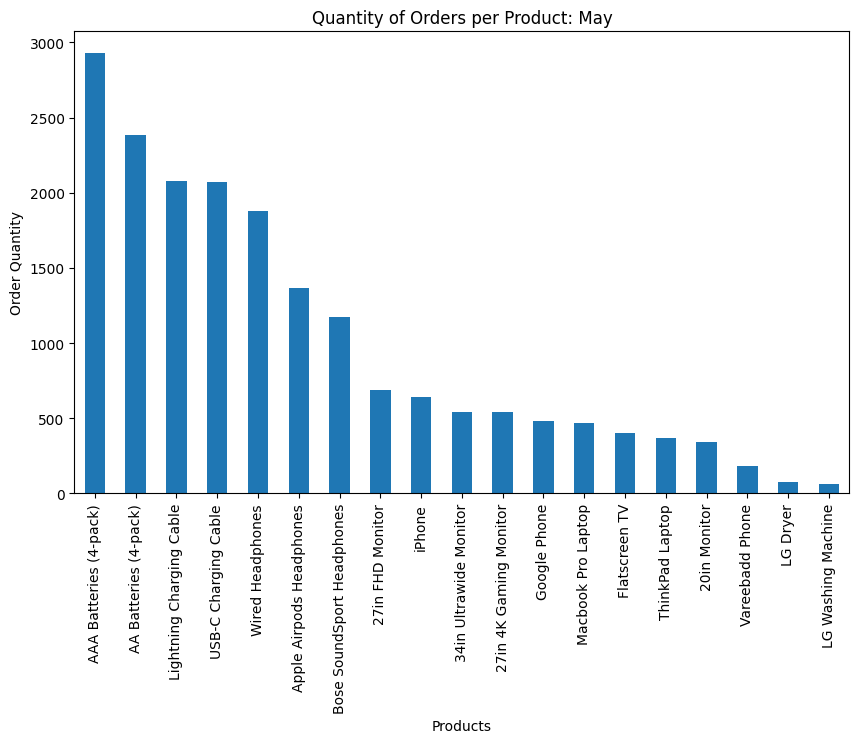

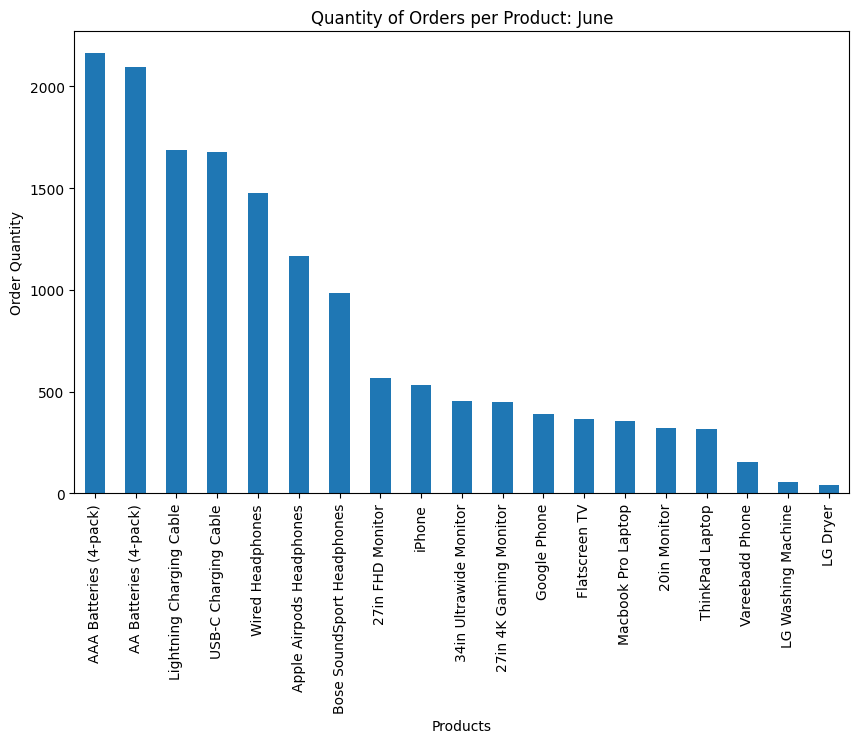

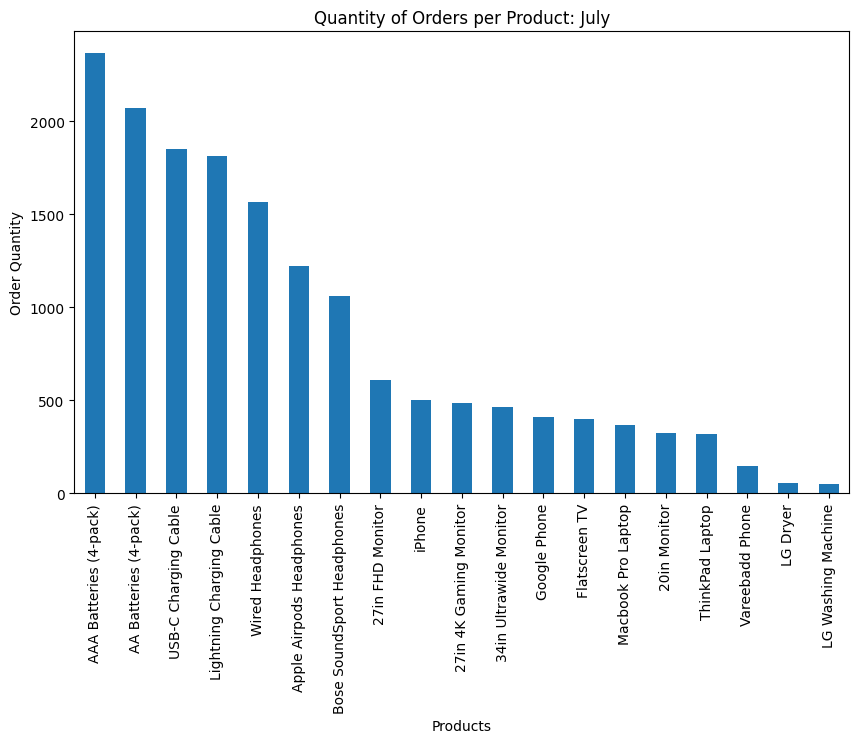

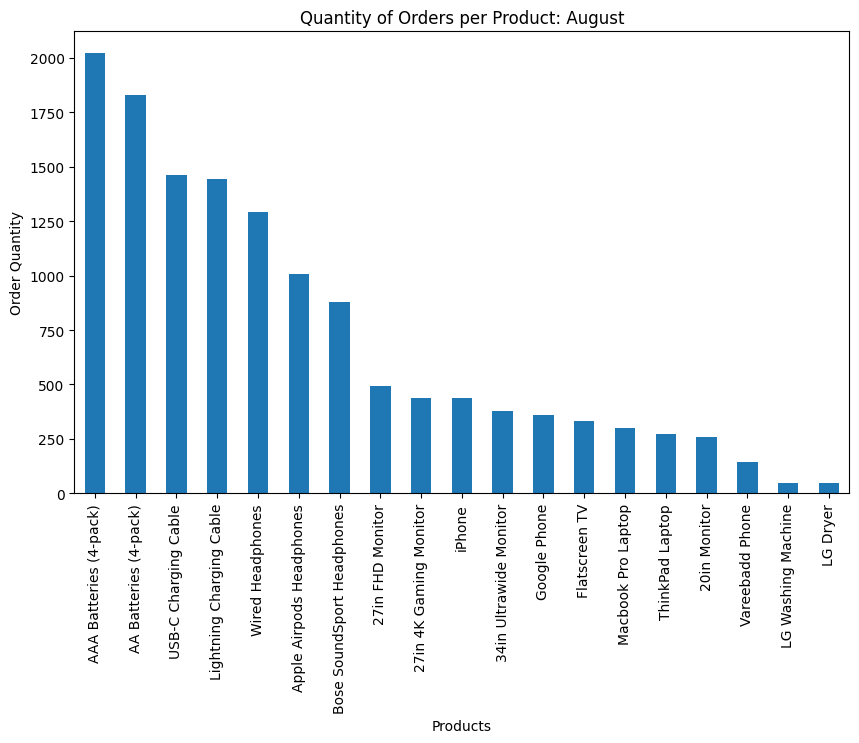

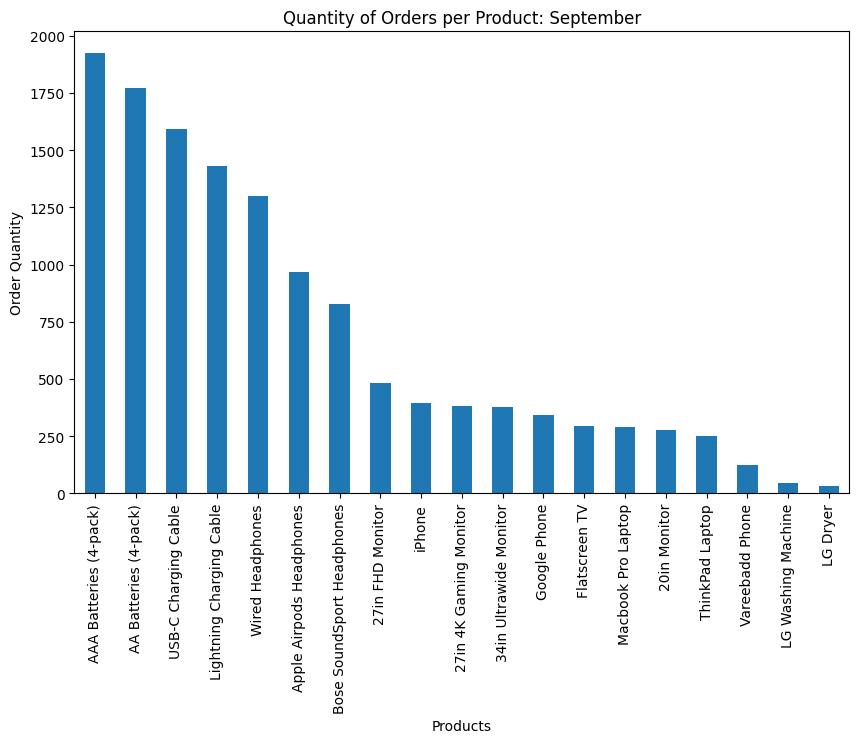

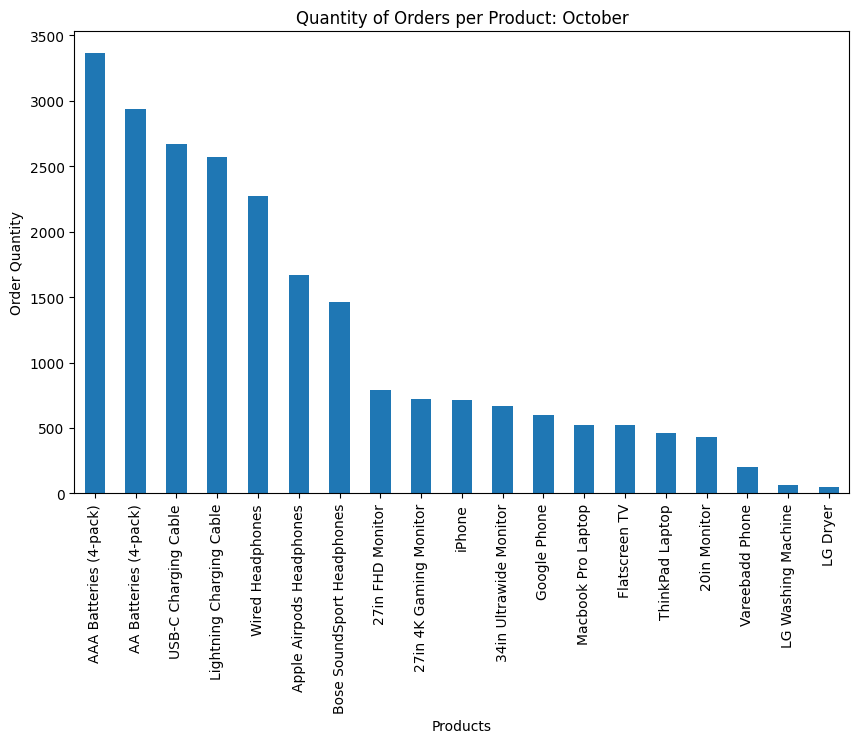

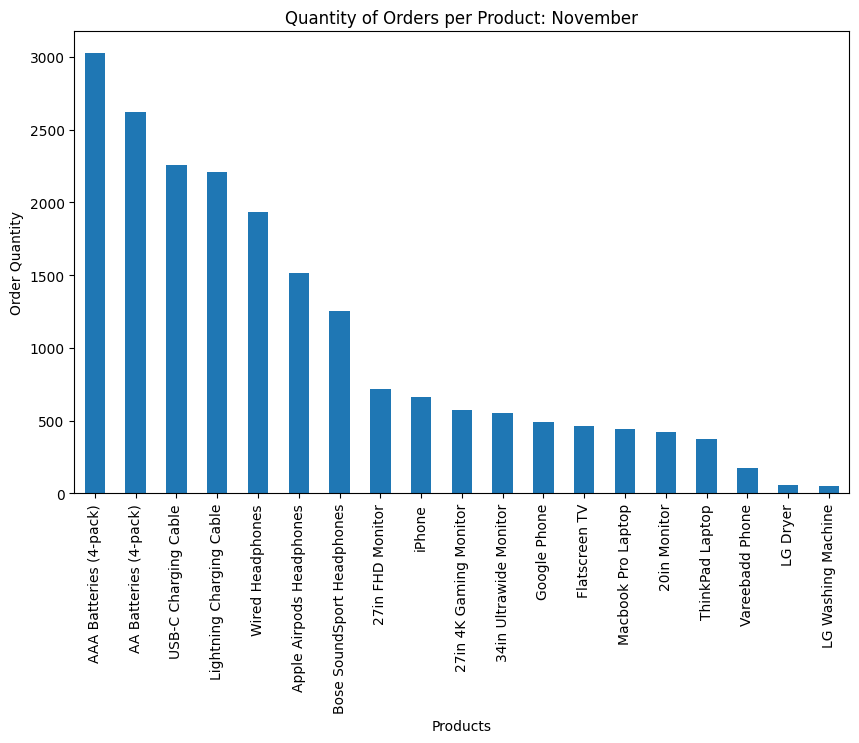

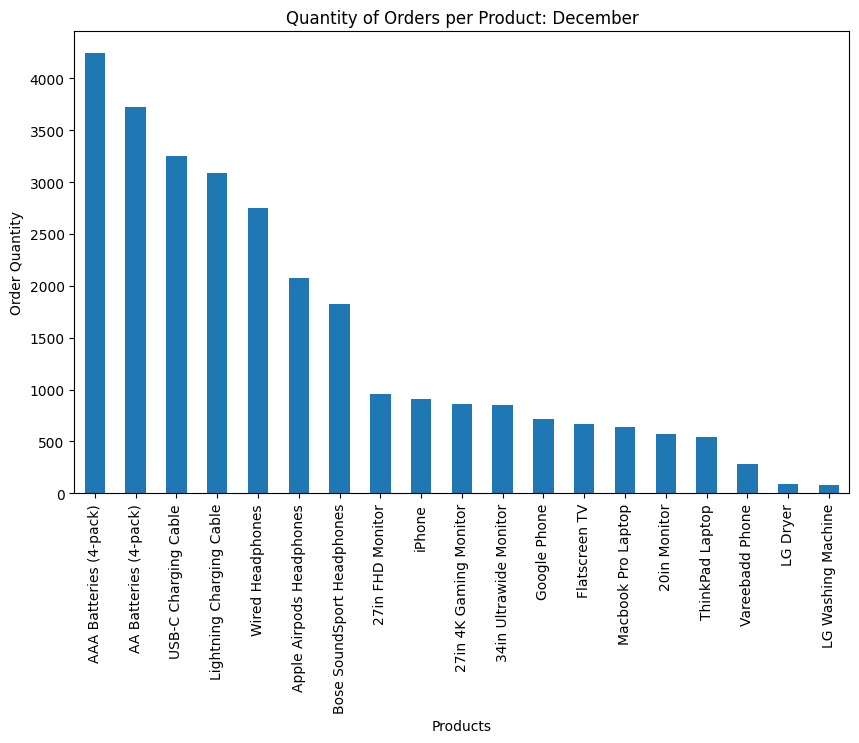

In [17]:
monthly_sales = df_sales.loc[:,['Producto','Cantidad Pedida',"Fecha de Pedido"]]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Fecha de Pedido'] = pd.to_datetime(monthly_sales['Fecha de Pedido'])
for mes in range(1,13):
  df_monthly = monthly_sales[monthly_sales['Fecha de Pedido'].dt.month == mes]
  df_monthly = df_monthly.groupby('Producto')['Cantidad Pedida'].sum() # I group product and quantity, as it is annual, the month does not matter.
  df_monthly = df_monthly.sort_values(ascending=False )
  plt.figure(figsize=(10, 6))
  df_monthly.plot.bar(rot=0)
  x = df_monthly.plot.bar(rot=90)
  plt.xlabel('Products')
  plt.ylabel('Order Quantity')
  plt.title("Quantity of Orders per Product: "+months[mes-1])

  plt.show()


###Results:


#####● What is the best-selling product overall and in each month?




#####AAA batteries are the best-selling product of the year and lead the sales ranking every month.





#####● What factors do you think have contributed to the success of that particular product?



#####The best-selling product of the year is AAA batteries, and this trend remains constant every month. This may be because customers look for these types of products, since they handle many electronic devices that require batteries. In addition, the affordable price of batteries encourages purchase. However, it is important to keep in mind that batteries, even if they are of a good brand, usually have a limited life1.
#####I understand that there may be several factors that may have contributed to the success of AAA batteries as the best-selling product, I proceed to list them:
#####1. Market Demand: High customer demand for AAA batteries indicates that there is significant need and interest in this type of product1.
#####2. Affordable price: The affordable price of AAA batteries may have been a key factor in stimulating purchase and making them attractive to customers.
#####3. Compatibility with electronic devices: AAA batteries are widely used in a variety of electronic devices, which may have contributed to their popularity.
#####4. Quality and reliability: Although AAA batteries may have a limited life, customers are likely to trust the quality and performance of the batteries you offer at your location.

#5. Sales trend:


● Is there any trend or pattern in sales that repeats itself over the days in different months?

● How do sales vary across different days of the week?

● Are there any significant differences in sales between business days and weekends?

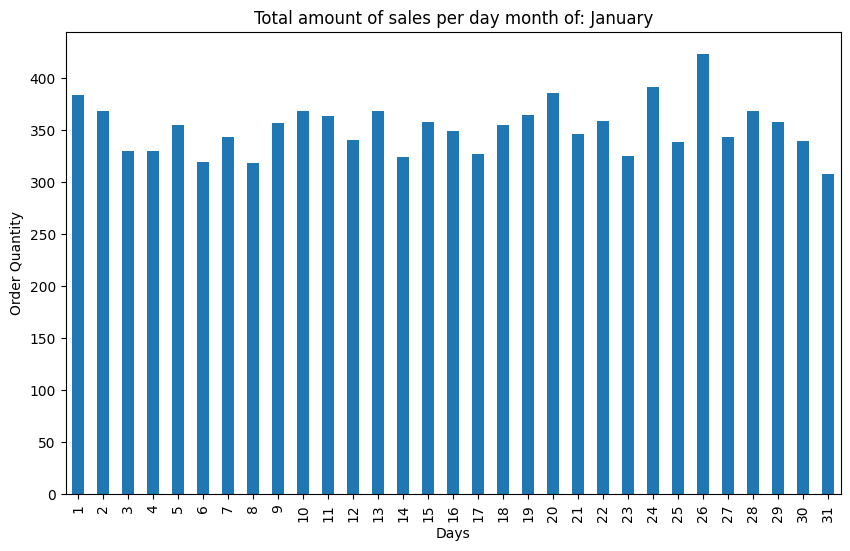

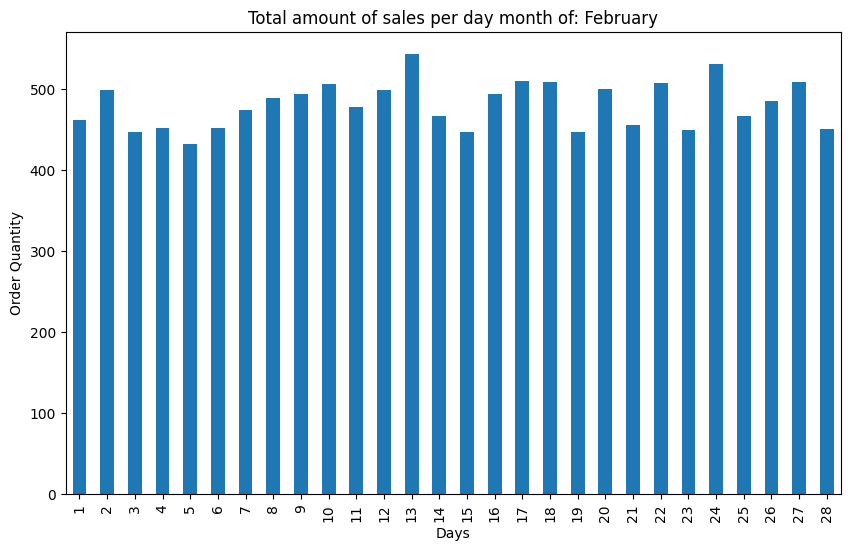

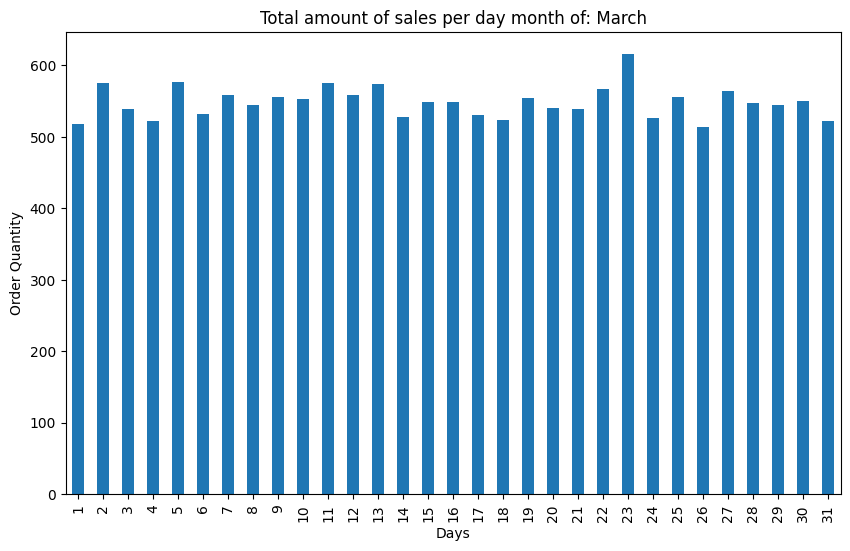

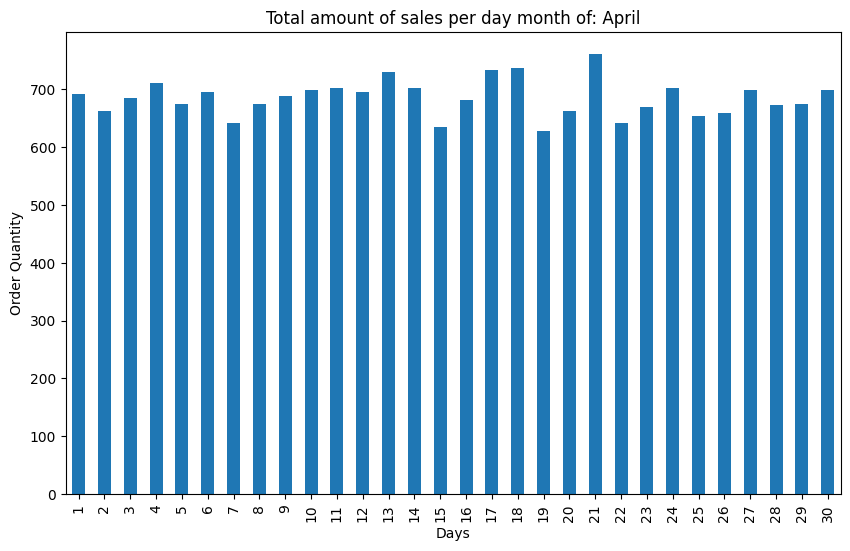

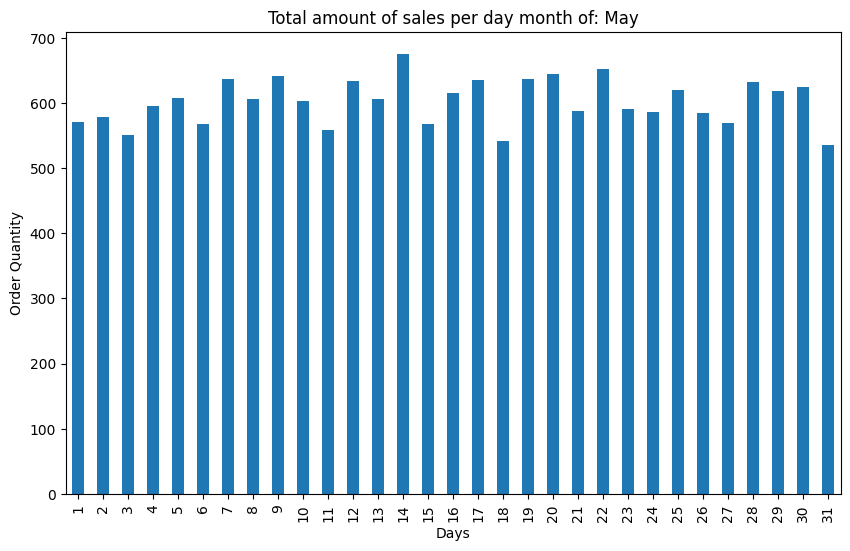

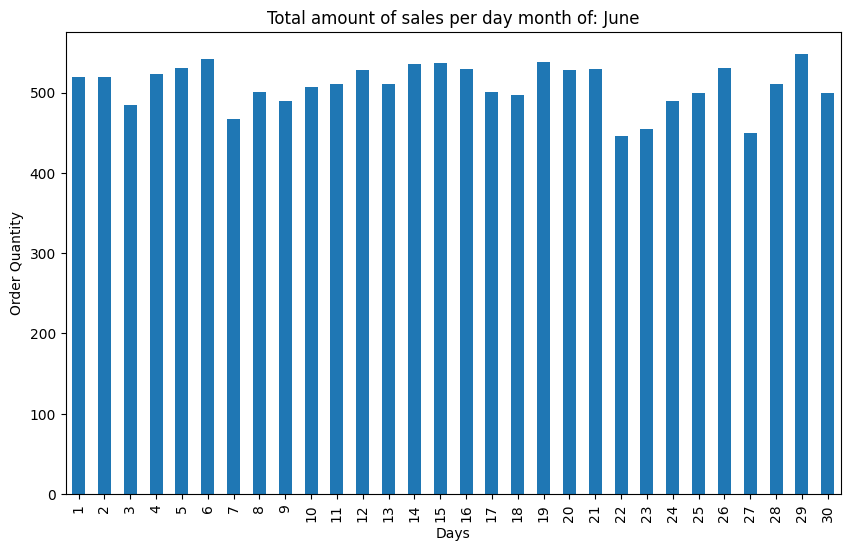

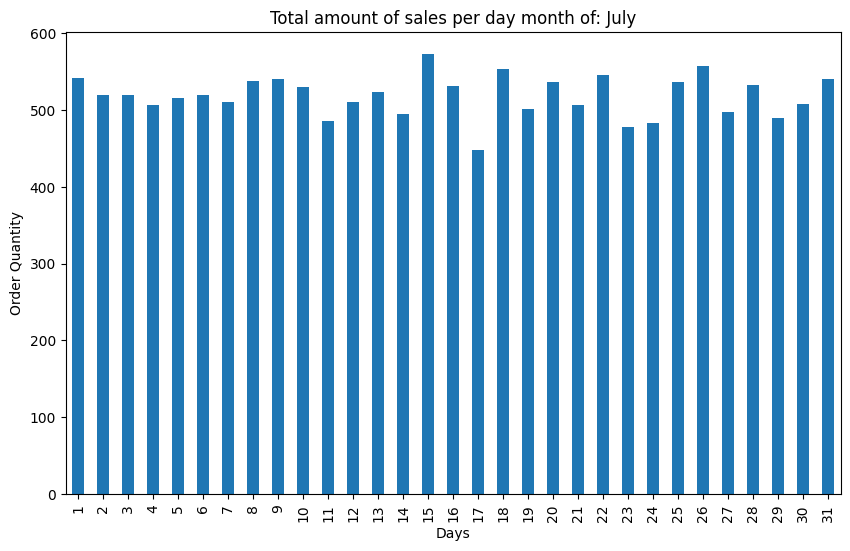

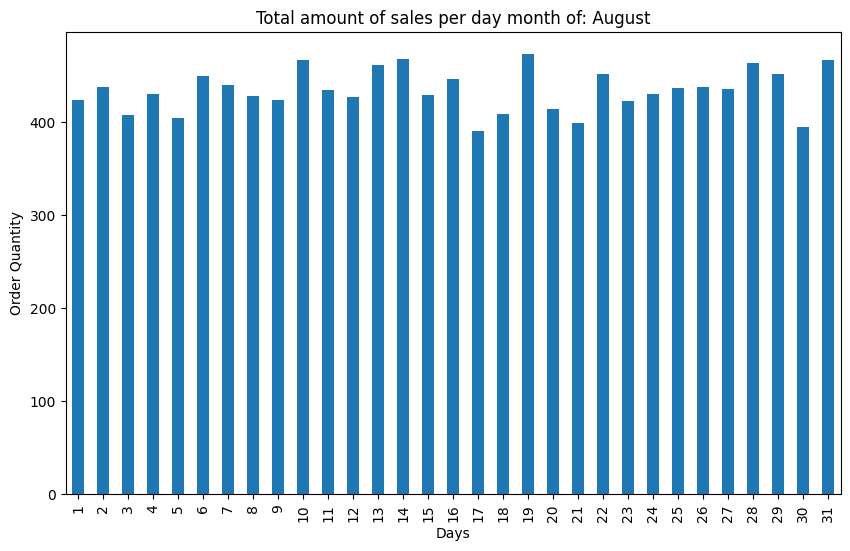

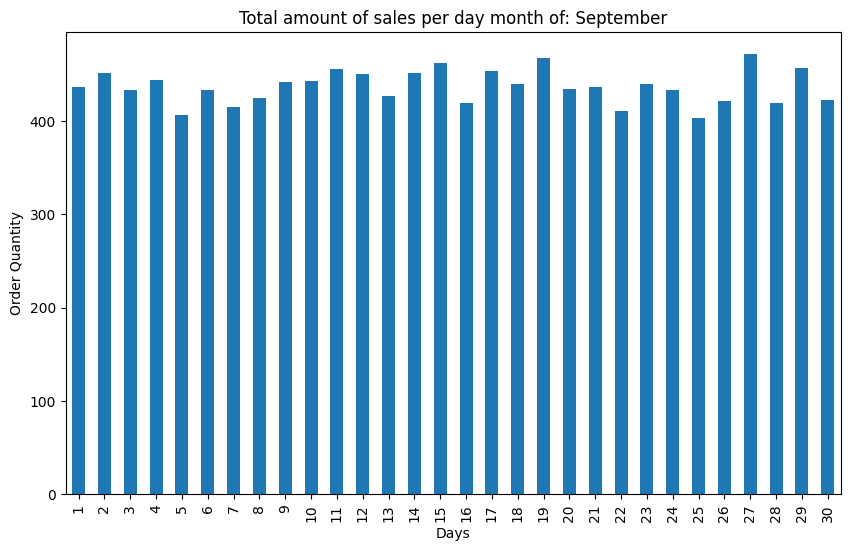

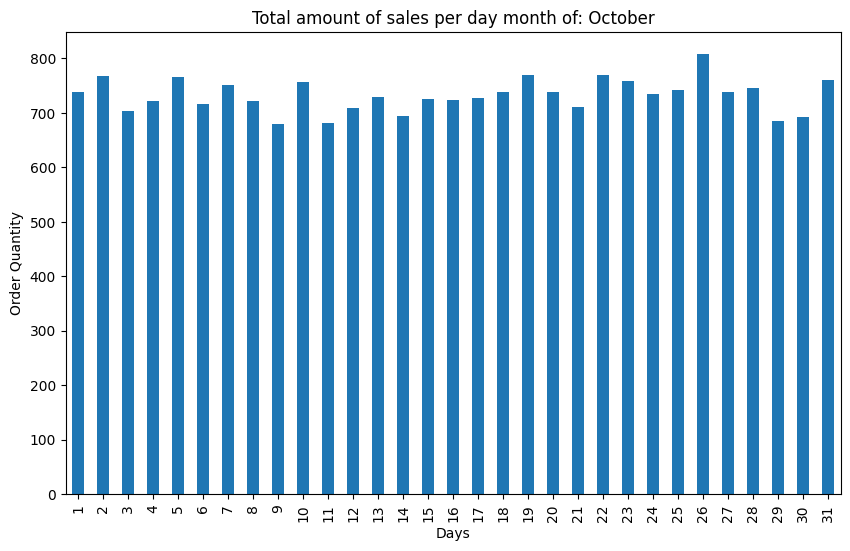

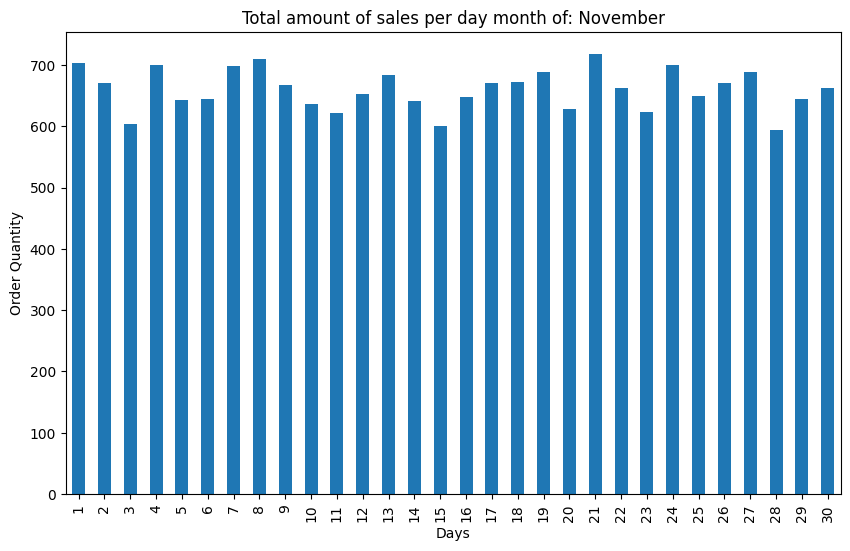

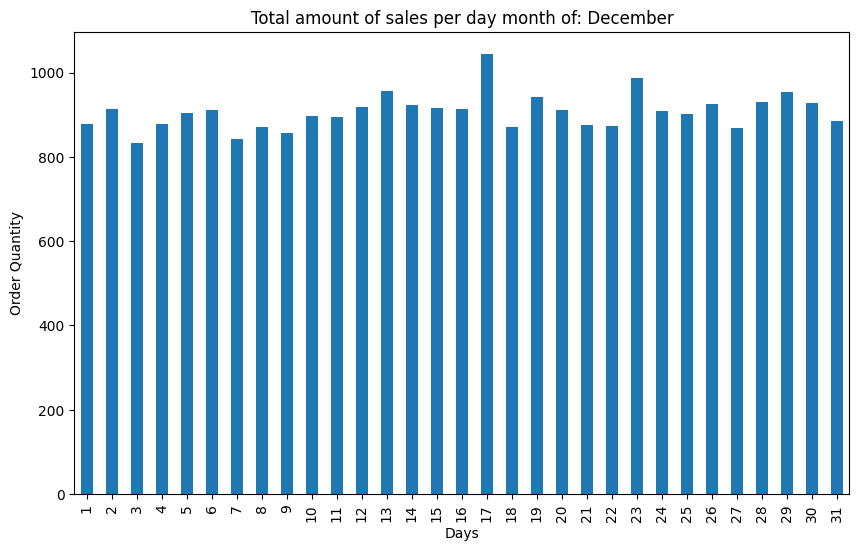

In [18]:
# This graph gives me the amount of total sales (of all products without distinction) per day in all months

# months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for day in range(1,13):
  january_sales = monthly_sales[monthly_sales['Fecha de Pedido'].dt.month == day].copy() # I extract the data for the month.
  january_sales = extraer_datos(january_sales) # I use the extract data function, which creates new columns in the DF with day and month.

  january_sales=january_sales.groupby("Dia")["Cantidad Pedida"].sum() # I add up the amount per day.

  plt.figure(figsize=(10, 6))
  january_sales.plot.bar(rot=0)
  x = january_sales.plot.bar(rot=90)
  plt.xlabel('Days')
  plt.ylabel('Order Quantity')
  plt.title("Total amount of sales per day month of: "+months[day-1])

  plt.show()

In [19]:
#This last graph fails to find a sales pattern beyond being able to achieve an average daily monthly sales.
quantity_per_day =  extraer_datos(monthly_sales)

quantity_per_day = quantity_per_day.loc[:,["Cantidad Pedida","Dia"]]
custom_day_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


quantity_per_day['Dia'] = pd.Categorical(quantity_per_day['Dia'], categories=custom_day_order, ordered=True)

fig = px.pie(quantity_per_day, values='Cantidad Pedida', names='Dia',
             title='Total percentage of annual sales per day')
fig.update_traces(textposition='inside', textinfo='percent+label', hole=.3)
fig.update_layout(width=900, height=800)
fig.show()

# This graph shows the percentage of daily sales. Shows what percentage of sales are made on certain days.
# As can be seen throughout the year the percentage of sales remains relatively the same. Therefore, over the course of the month, day by day, approximately the same amount is sold.
# No significant variations are seen throughout the month.

# The only notable thing is that the 13th of each month are the days that accumulate the highest sales,
# although the difference with respect to the rest of the days is insignificant,
# with only the last day on the 31st registering the lowest amount (this given that only 4 months in the month have 31 days).
# Finally, it could be said that there is no day or group of days of the month that statistically has a notable difference in terms of sales over the rest of the days,
#  over the course of the year.


In [20]:

df_sales['Fecha de Pedido'] = pd.to_datetime(df_sales['Fecha de Pedido'])
df_sales['nombre_dia'] = df_sales['Fecha de Pedido'].dt.day_name() # I create a new column with the name days.
df_sales_by_day = df_sales.groupby("nombre_dia")["Cantidad Pedida"].sum()

df_sales_by_day_df2 = pd.DataFrame(df_sales_by_day)
df_sales_by_day_df2.reset_index(inplace=True)


orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# I convert the 'days' column into a categorical variable with the days sorted for better graphing.
df_sales_by_day_df2['nombre_dia'] = pd.Categorical(df_sales_by_day_df2['nombre_dia'], categories=orden_dias, ordered=True)


df_sales_by_day_df2 = df_sales_by_day_df2.sort_values(by='nombre_dia')



days = df_sales_by_day_df2["nombre_dia"]
sales = df_sales_by_day_df2["Cantidad Pedida"]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=days,
    y=sales,
    marker=dict(color=sales, colorscale = 'viridis', colorbar=dict(title="Total sales", x=1.0, thickness=15)),
    text=sales,
    textposition='auto',

))


fig.update_layout(
    title="Total sales per Day",
    xaxis=dict(title="Day"),

)

fig.show()



In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(
        x=days,
        y=sales,
        mode='lines',

        line=dict(width=2,shape='spline'),
    ))

fig.update_layout(
    title="Total sum of sales per day of the week",
    xaxis=dict(title="Days", tickvals=days),
    yaxis=dict(title="Total amount", side="left"),
    legend=dict(y=0.3, yanchor='bottom'),
)

fig.show()

In [73]:


precio = df_sales['Precio Unitario']

cantidad = df_sales['Cantidad Pedida']




df_sales["Precio"] = precio * cantidad
df_sales2 = df_sales.loc[:,['Precio','nombre_dia']]

df_sales2 = df_sales2.groupby('nombre_dia')['Precio'].sum()

df_sales2 = df_sales2.reset_index()
df_sales2.columns = ['dias', 'monto_total']



orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# I convert the 'days' column into a categorical variable with the days sorted for better graphing.
df_sales2['dias'] = pd.Categorical(df_sales2['dias'], categories=orden_dias, ordered=True)


df_sales2 = df_sales2.sort_values(by='dias')





# I create the variables with the data and graph.

money = df_sales2['monto_total']
days_order = df_sales2['dias']


fig = go.Figure()
fig.add_trace(go.Scatter(
        x=days_order,
        y=money,
        mode='lines',

        line=dict(width=2,shape='spline'),
    ))

fig.update_layout(
    title="Total income per weekly days",
    xaxis=dict(title="Days", tickvals=days),
    yaxis=dict(title="Total amount", side="left"),
    legend=dict(y=0.3, yanchor='bottom'),
)

fig.show()



###Results:


#####● Is there any trend or pattern in sales that repeats itself over the days in different months?


#####Charts 5.1 to 5.12 show the daily amount of products sold throughout the days of each month. As you can see, sales are relatively stable and constant throughout the month. With a difference of similar daily minimums and maximums.
#####Graph 5.13 is particularly interesting, because it shows a pie chart that represents a full month with 31 days, which averages the sales made each day of each month over the course of a year (including the highest sales months such as December ). As you can see, each day contributes approximately 3% of the total to sales each month. With an average maximum of sales on the 13th of each month being around 3.4% of the total and a minimum corresponding to the 31st of 1.92%, this is understandable because only 4 months a year have the 31st. The same could be said of the 30th. (there are only 4 days 30 per month) but the accumulated sales of these days are 57.29% higher than the 31st, which is notable.
#####The percentage variation of the day with the highest average sales with the day with the lowest average sales (days 13 and 31 respectively) is 77.09%.
#####Graph 5.14 shows us a week. Taking all the days of the month, and adding up their total sales, we can see which day of the week sold the most and which day sold the least. We can once again conclude that sales continue to be stable throughout the week, with similar minimums and maximums, with sales rising from Mondays, a maximum on Tuesday, and then decreasing to a minimum on Friday. Finally, graphs 5.15 and 5.16 once again show this pattern of minimal change in weekly sales, both in quantity (graph 5.15) and amount expressed in monetary income (graph 5.16).



#####● How do sales vary across different days of the week?


#####Graphs 5.15 and 5.16 are the most indicative of the trends throughout the weeks. The pattern is clear, although with no substantive differences in quantities, sales begin to rise on Saturday to reach a peak on Tuesdays and then decline to a minimum on Fridays. Graph 5.14 also shows this.






#####● Are there any significant differences in sales between business days and weekends?


#####As we said in the previous points, although there is a pattern of modification in the quantities sold over the course of the 7 days of the week, the differences are not substantial. In any case, there is a difference and it is interesting to see that non-working days (Saturdays and Sundays) have a higher percentage of total sales than Fridays and Thursdays.






#6. Impact of special events on sales:

● Has there been any significant increase or decrease in sales in days close to special events, such as holidays?


● What specific events have had a notable impact on the behavior of sales and how was that impact manifested?

In [23]:
# Before analyzing whether there is a difference in sales (quantity and amount) between a normal day and a holiday,
# it is interesting to calculate the average sales per day of each product and then compare.

# Halloween 31/10  - jueves 24 de noviembre.Thanksgiving Day (Acción de gracias) -Christmas (Navidad) 24 25 12 - tercer lunes de enero de cada año Martin Luther King Day-
# Third Monday in February dia del presidente - marzo a abril spring brakes - 4 / 7 independencia
#
df_daily_sales = df_sales.groupby(['Producto', df_sales['Fecha de Pedido'].dt.date]).sum(numeric_only=True)

# Calculate the average daily sales for each product throughout the year.
df_mean_daily_sales = df_daily_sales.groupby('Producto').mean()


# I convert that subset to a DF.
df_mean_daily_sales = df_mean_daily_sales.reset_index()


fig = px.bar(df_mean_daily_sales, x = 'Cantidad Pedida', y = 'Producto')
fig.update_layout(
    xaxis_title="Daily average sales.",
    yaxis_title="Product",
)
fig.show()


In [24]:
def dateSelector(day, month):  # I create a function that allows me to only select a sales group, according to a certain date.

  sales_group = df_sales[df_sales['Fecha de Pedido'].dt.day == day] # Choose the day.
  sales_group = sales_group[sales_group['Fecha de Pedido'].dt.month == month] # Choose the month.
  sales_group = sales_group.groupby(['Producto', sales_group['Fecha de Pedido'].dt.date]).sum(numeric_only=True)
  sales_group = sales_group.groupby('Producto').mean()
  sales_group = sales_group.reset_index()
  return sales_group


# #  Halloween 31/10  - jueves 24 de noviembre.Thanksgiving Day (Acción de gracias) -Christmas (Navidad) 24 25 12 - tercer lunes de enero de cada año Martin Luther King Day-
# # Third Monday in February dia del presidente - marzo a abril spring brakes - 4 / 7 independencia

halloween = dateSelector(31,10)



fig = px.bar(halloween, x = 'Cantidad Pedida', y = 'Producto')
fig.update_layout(
    xaxis_title="Halloween Day.",
    yaxis_title="Product",
)
fig.show()
import numpy as np


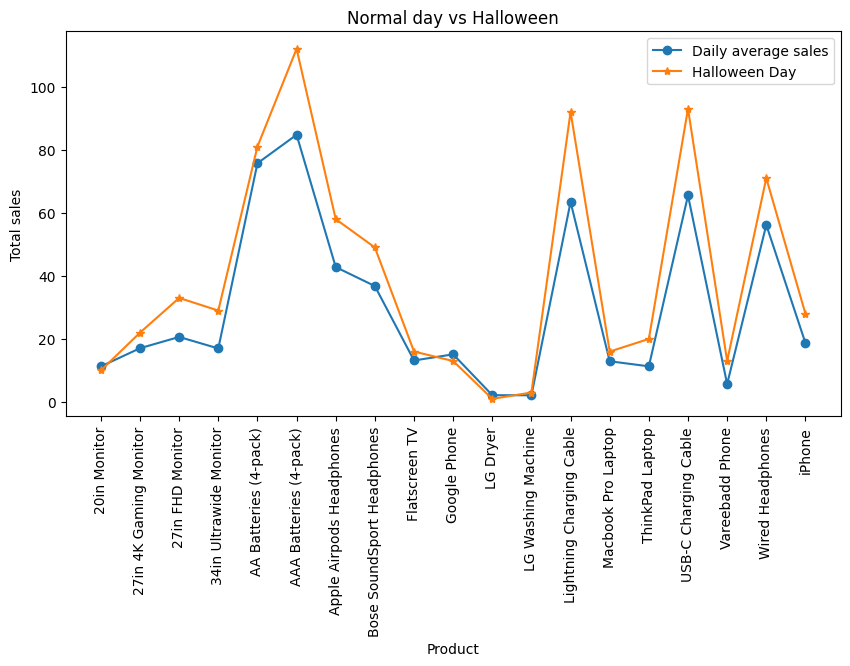

In [25]:
product = halloween["Producto"]
daily_average = df_mean_daily_sales["Cantidad Pedida"]
halloween_mean = halloween["Cantidad Pedida"]

plt.figure(figsize=(10,5))


plt.plot(product, daily_average, marker='o', label='Daily average sales')
plt.plot(product, halloween_mean, marker='*', label='Halloween Day')

plt.xlabel('Product')
plt.ylabel('Total sales')
plt.title('Normal day vs Halloween')
plt.legend()
plt.xticks(rotation=90)

plt.show()

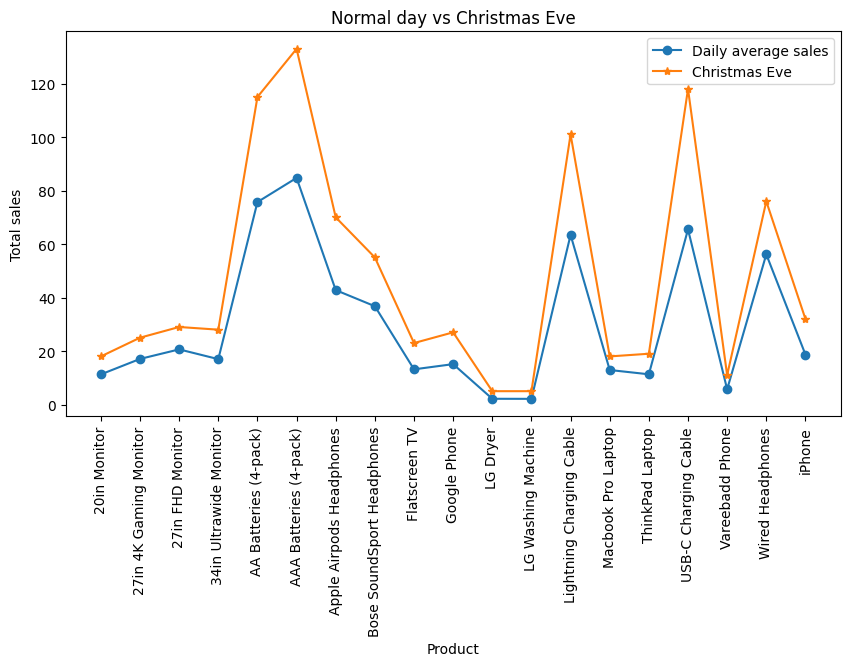

In [26]:
christmas_eve = dateSelector(24,12)
christmas_eve_mean = christmas_eve["Cantidad Pedida"]


plt.figure(figsize=(10,5))


plt.plot(product, daily_average, marker='o', label='Daily average sales')
plt.plot(product, christmas_eve_mean, marker='*', label='Christmas Eve')

plt.xlabel('Product')
plt.ylabel('Total sales')
plt.title('Normal day vs Christmas Eve')
plt.legend()
plt.xticks(rotation=90)

plt.show()

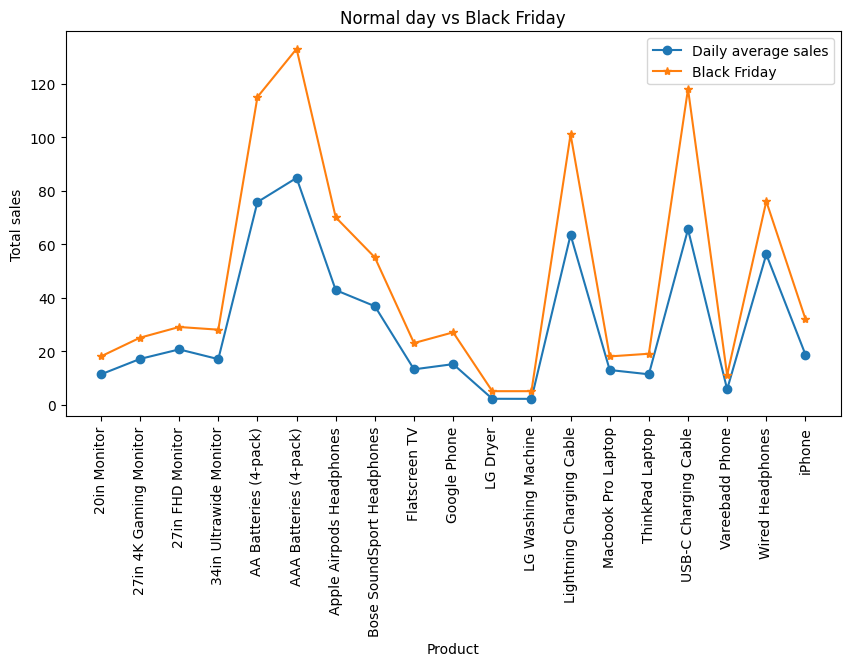

In [27]:
black_friday = dateSelector(29,11)
black_friday_mean = christmas_eve["Cantidad Pedida"]


plt.figure(figsize=(10,5))


plt.plot(product, daily_average, marker='o', label='Daily average sales')
plt.plot(product, black_friday_mean, marker='*', label='Black Friday')

plt.xlabel('Product')
plt.ylabel('Total sales')
plt.title('Normal day vs Black Friday')
plt.legend()
plt.xticks(rotation=90)

plt.show()

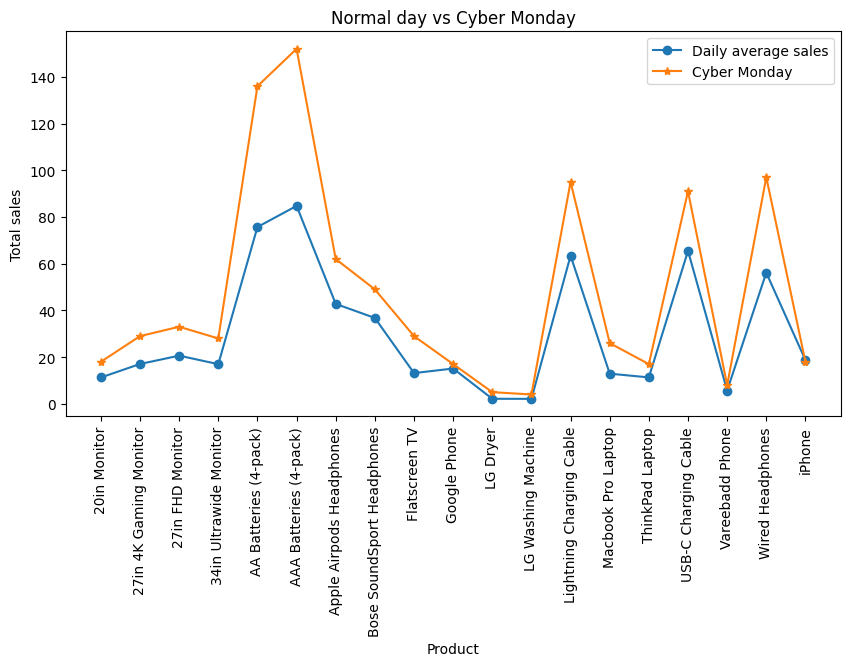

In [28]:
cyber_monday = dateSelector(2,12)
cyber_monday_mean = cyber_monday["Cantidad Pedida"]


plt.figure(figsize=(10,5))


plt.plot(product, daily_average, marker='o', label='Daily average sales')
plt.plot(product, cyber_monday_mean, marker='*', label='Cyber Monday')

plt.xlabel('Product')
plt.ylabel('Total sales')
plt.title('Normal day vs Cyber Monday')
plt.legend()
plt.xticks(rotation=90)

plt.show()

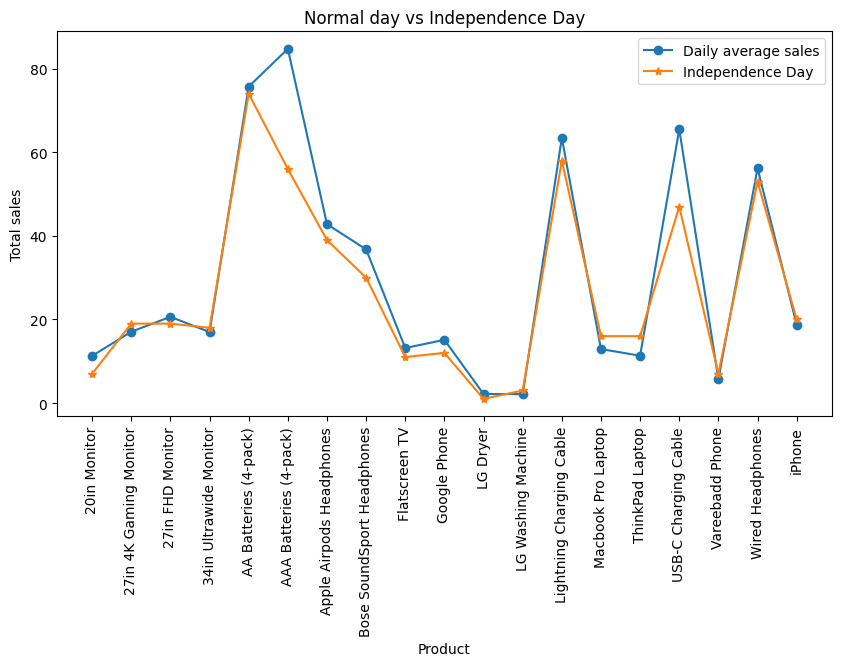

In [74]:
independence_day = dateSelector(4,7)
independence_day_mean = independence_day["Cantidad Pedida"]


plt.figure(figsize=(10,5))


plt.plot(product, daily_average, marker='o', label='Daily average sales')
plt.plot(product, independence_day_mean, marker='*', label='Independence Day')

plt.xlabel('Product')
plt.ylabel('Total sales')
plt.title('Normal day vs Independence Day')
plt.legend()
plt.xticks(rotation=90)

plt.show()


###Results:

#####● Has there been any significant increase or decrease in sales in days close to special events, such as holidays?



#####Before starting to see if there are differences in sales between normal days and holidays, graph 6.1 shows us the average daily sales of each product throughout the year.
#####After this we take the 5 most important holidays of the American Union, which are:
•	Halloween
•	Christmas
• Black Friday
•	Independence Day
• Cyber Monday

#####In each of the graphs that can be seen, sales on these special days are greater than on regular days. We especially found differences in graphs 6.3, 6.4, 6.5, corresponding to the dates of Halloween, Christmas Eve or the night before Christmas, Cyber Monday.

#####Therefore, we can conclude that there is indeed a noticeable difference in the level of sales between important holidays and regular days of the year.






#####● What specific events have had a notable impact on the behavior of sales and how was that impact manifested?



#####Looking at graph 5.12 we notice that the days with the most sales at an annual level were December 17 and the 22 of the same month. We assume this is due to Christmas shopping.